# JULİA İLE İSTATİSTİKSEL PAKET PROGRAMLAMA

## BATUHAN DOĞANAY 20181101051

In [258]:
using Pkg

Pkg.add(["CSV","DataFrames","BenchmarkTools","DelimitedFiles","XLSX","Statistics","StatsBase","RDatasets","Plots","StatsPlots","KernelDensity","Distributions","LinearAlgebra","HypothesisTests","PyCall","MLBase","GLM","Lathe","ROCAnalysis"])

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


In [259]:
using BenchmarkTools
using DataFrames
using DelimitedFiles
using CSV
using XLSX
using Statistics
using StatsBase
using RDatasets
using Plots
using StatsPlots
using KernelDensity
using Distributions
using LinearAlgebra
using HypothesisTests
using PyCall
using MLBase
using DataFrames
using GLM
using Lathe
using MLBase
using ROCAnalysis

In [260]:
Pkg.add("CSV")
using CSV
?CSV.read()

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


LoadError: syntax: invalid identifier name "?"

In [424]:
elc=CSV.read("Elektrikli_Arac.csv",DataFrame)

,Name,Acceleration_SEC,TopSpeed_KM_H,Range_H
,String63,Int64,Int64,Int64
1,Porsche_Taycan_Turbo_S,1,260,390
2,Audi_e-tron_GT_RS,1,250,405
3,Tesla_Roadster_,1,410,970
4,Tesla_Model_Y_Performance,1,241,430
5,Porsche_Taycan_Turbo,1,260,400
6,Porsche_Taycan_4S,1,250,375
7,Porsche_Taycan_4S_Plus,1,250,435
8,Tesla_Cybertruck_Dual_Motor,1,190,460
9,Tesla_Cybertruck_Tri_Motor,1,210,750


# TANIMLAYICI İSTATİSTİKLER

### Hava kirliliği artışı, petrol kaynaklarının azalması ile ters orantılı olarak pahalılaşmasıyla birlikte elektrikli araç kullanımının popüleştirildiğini farkındayız. Seçtiğimiz veri, elektrikli araçlar hakkında ön bilgi sahibi olmayı ve bizler için en performanslı olanı tercih etmemizde yardımcı olacak testler uygulayacağız. 

### Verimizde uygulayacağımız testler;
##### Kernel density estimation test
##### One Sample T test
##### Doğrusal Regresyon train test
##### Lojistik Regresyon analizi
##### Karar Ağacı
##### Random forest
##### K-Kümeleme testi
##### K-En yakın kümeleme testi


#### Veri setim 181 gözlemden oluşuyor. Sırasıyla  aşağıdaki işlemleri uyguladım:
1.	Verideki kullanılmayacak olan değişkenleri sildim.
2.	NA verileri çıkardım.
3.	Acceleration_SEC değişkenini 0-100 saniye arası hızlanmayı Excel üzerinden 3 kategoriye bölüp numeric değerlere atadım kullanım kolaylığı açısından.
4.	Drive değişkenindeki 3 kategorili çekiş sistemlerini EXCEL üzerinden numeric değerlere atadım kullanım kolaylığı açısından .
5.	NumberofSeats değişkenindeki 2 kategorili araç boyutunu EXCEL üzerinden numeric değerler atadım kullanım kolaylığı açısından.
6.	effi değişkenimiz aracın ortalama yakıtı temsil eden değişkenimiz Excel üzerinden 3 kategoriye bölüp numeric değerler atadım kullanım kolaylığı açısından.
7.  Gözlem sayısı 123 oldu.

## Drive;

#### ->	1 = 4 Çeker 
#### ->	2 = Ön Çeker
#### ->	3 = Arka İter

## NumberofSeats;

#### ->	1 = Alçak Araç
#### -> 0 = Yüksek Araç 

## effi;

#### ->	1 = Yüksek Mesafe 
#### ->	2 = Normal Mesafe
#### ->	3 = Düşük Mesafe

In [757]:
elc

,Name,Acceleration_SEC,TopSpeed_KM_H,Range_H
,String63,Int64,Int64,Int64
1,Porsche_Taycan_Turbo_S,1,260,390
2,Audi_e-tron_GT_RS,1,250,405
3,Tesla_Roadster_,1,410,970
4,Tesla_Model_Y_Performance,1,241,430
5,Porsche_Taycan_Turbo,1,260,400
6,Porsche_Taycan_4S,1,250,375
7,Porsche_Taycan_4S_Plus,1,250,435
8,Tesla_Cybertruck_Dual_Motor,1,190,460
9,Tesla_Cybertruck_Tri_Motor,1,210,750


In [425]:
describe(elc)

,variable,mean,min,median,max
,Symbol,Union…,Any,Union…,Any
1,Name,,Audi_Q4_Sportback_e-tron_35,,Volvo_XC40_Recharge_Twin_Pure_Electric
2,Acceleration_SEC,1.89431,1,2.0,3
3,TopSpeed_KM_H,186.276,123,180.0,410
4,Range_H,361.626,165,355.0,970
5,Efficiency_WH_KM,192.033,144,188.0,281
6,effi,1.91057,1,2.0,3
7,FastChargeSpeed,533.984,150,470.0,1410
8,Drive,1.88618,1,2.0,3
9,NumberofSeats,0.528455,0,1.0,1


#### Yukarıdaki tablo veri setimize ait temel istatistikleri veriyor.

In [426]:
elc.effi

123-element Vector{Int64}:
 3
 3
 2
 2
 3
 2
 2
 3
 3
 3
 3
 3
 1
 ⋮
 1
 2
 3
 1
 3
 3
 1
 1
 1
 2
 3
 3

In [427]:
elc.Drive

123-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 3
 2
 2
 2
 2
 2
 2
 2
 2
 3
 2
 2

In [428]:
elc.NumberofSeats

123-element Vector{Int64}:
 1
 1
 1
 0
 1
 1
 1
 0
 0
 1
 1
 0
 1
 ⋮
 0
 1
 0
 1
 0
 0
 0
 0
 0
 0
 0
 0

In [429]:
elc.NumberofSeats

123-element Vector{Int64}:
 1
 1
 1
 0
 1
 1
 1
 0
 0
 1
 1
 0
 1
 ⋮
 0
 1
 0
 1
 0
 0
 0
 0
 0
 0
 0
 0

#### Yukarıdaki çıktılarda kategorik değişkenlerimizin değerlerini gözlemliyoruz.

In [430]:
typeof(elc)

DataFrame

#### Yukarıda Verimizin Dataframe olduğunu sorguluyoruz.

In [431]:
size(elc)

(123, 11)

#### Yukarıda Verimizin boyutunu gözlemiyoruz.

In [432]:
names(elc)

11-element Vector{String}:
 "Name"
 "Acceleration_SEC"
 "TopSpeed_KM_H"
 "Range_H"
 "Efficiency_WH_KM"
 "effi"
 "FastChargeSpeed"
 "Drive"
 "NumberofSeats"
 "PriceinGermany_EURO"
 "Number_of_Seats"

#### Yukarıda görüldüğü gibi değişken isimlerimizi getiriyoruz.

In [433]:
first(elc,10)

,Name,Acceleration_SEC,TopSpeed_KM_H,Range_H,Efficiency_WH_KM
,String63,Int64,Int64,Int64,Int64
1,Porsche_Taycan_Turbo_S,1,260,390,215
2,Audi_e-tron_GT_RS,1,250,405,210
3,Tesla_Roadster_,1,410,970,206
4,Tesla_Model_Y_Performance,1,241,430,177
5,Porsche_Taycan_Turbo,1,260,400,209
6,Porsche_Taycan_4S,1,250,375,189
7,Porsche_Taycan_4S_Plus,1,250,435,192
8,Tesla_Cybertruck_Dual_Motor,1,190,460,261
9,Tesla_Cybertruck_Tri_Motor,1,210,750,267


#### Bu kod ile değişkenlerimizin ilk 10 verimizi gözlemliyoruz.

In [434]:
describe(elc, :mean, :std)

,variable,mean,std
,Symbol,Union…,Union…
1,Name,,
2,Acceleration_SEC,1.89431,0.624802
3,TopSpeed_KM_H,186.276,43.8079
4,Range_H,361.626,119.359
5,Efficiency_WH_KM,192.033,28.9431
6,effi,1.91057,0.757564
7,FastChargeSpeed,533.984,255.047
8,Drive,1.88618,0.841576
9,NumberofSeats,0.528455,0.501231


#### Bu kısımda değişkenlerimizin standart sapması ve ortalamasını yukarıdaki grafikten inceleyebiliriz.

In [436]:
dropmissing(elc)

,Name,Acceleration_SEC,TopSpeed_KM_H,Range_H
,String63,Int64,Int64,Int64
1,Porsche_Taycan_Turbo_S,1,260,390
2,Audi_e-tron_GT_RS,1,250,405
3,Tesla_Roadster_,1,410,970
4,Tesla_Model_Y_Performance,1,241,430
5,Porsche_Taycan_Turbo,1,260,400
6,Porsche_Taycan_4S,1,250,375
7,Porsche_Taycan_4S_Plus,1,250,435
8,Tesla_Cybertruck_Dual_Motor,1,190,460
9,Tesla_Cybertruck_Tri_Motor,1,210,750


#### Bu kod ile missing datalarımıza atama yapabiliriz fakat veri setimizde missing data olmadığı için analize devam ediyoruz.

In [437]:
nrow(elc), ncol(elc)

(123, 11)

#### Bu kod ile Veri setimizin satır ve sütun sayılarını gözlemliyoruz.

In [438]:
Matrix(elc)

123×11 Matrix{Any}:
 "Porsche_Taycan_Turbo_S"               …   860  1  1  186.336  "Alçak_araç"
 "Audi_e-tron_GT_RS"                        810  1  1  138.2    "Alçak_araç"
 "Tesla_Roadster_"                          920  1  1  215.0    "Alçak_araç"
 "Tesla_Model_Y_Performance"                720  1  0   66.965  "Yüksek_araç"
 "Porsche_Taycan_Turbo"                     840  1  1  153.016  "Alçak_araç"
 "Porsche_Taycan_4S"                    …   750  1  1  106.487  "Alçak_araç"
 "Porsche_Taycan_4S_Plus"                   910  1  1  113.008  "Alçak_araç"
 "Tesla_Cybertruck_Dual_Motor"              710  1  0   55.0    "Yüksek_araç"
 "Tesla_Cybertruck_Tri_Motor"               710  1  0   75.0    "Yüksek_araç"
 "Audi_e-tron_S_55_quattro"                 510  1  1   93.8    "Alçak_araç"
 "Audi_e-tron_S_Sportback_55_quattro"   …   540  1  1   96.05   "Alçak_araç"
 "Jaguar_I-Pace_EV400"                      340  1  0   77.3    "Yüksek_araç"
 "Lucid_Air_Grand_Touring"                 1380  1  

#### Bu kod ile Veri setimizin matris halini gözlemliyoruz.

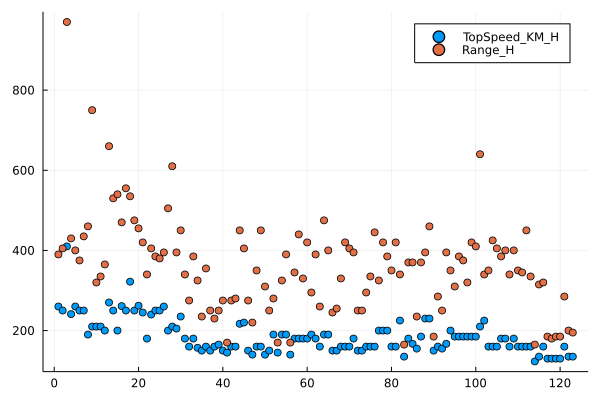

In [439]:
choles=elc[!,:TopSpeed_KM_H]
scatter(choles,label="TopSpeed_KM_H")
hdis=elc[!, :Range_H]
scatter!(hdis,label="Range_H")

#### Yukarıdaki grafik seçtiğim 2 bağımsız değişken maksimum hız ve maksimum mesafe değişkenlerinin saçılım grafiğini temsil ediyor.

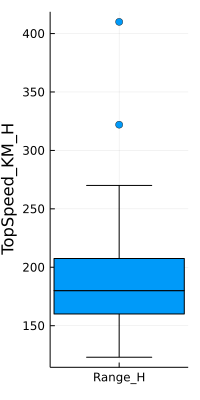

In [440]:
boxplot(["Range_H"],choles,legend=false,size=(200,400),ylabel="TopSpeed_KM_H")

#### Grafiğe baktığımızda 400 ve 300-350 değerlerinde aykırı gözlem olduğunu görüyoruz kutu grafiğini ise sağa çarpık ve simetrik olarak yorumlayabiliriz.

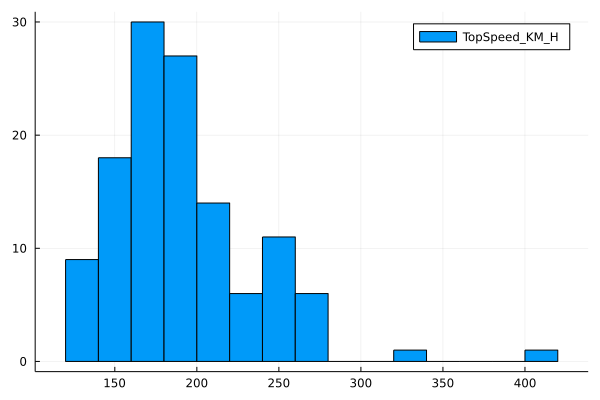

In [441]:
histogram(choles,label="TopSpeed_KM_H")

##### Histogram grafiğine baktığımızda iste sağa çarpık ve sivri olduğunu gözlemliyoruz ve yaklaşık olarak 325 ve 450 değerlerinde aykırı gözlem olduğunu gözlemliyoruz.

## Kernel density estimation

In [442]:
p=kde(choles)

UnivariateKDE{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}}}(74.25722060665896:0.1878288025337968:458.74277939334104, [2.0845170076817451e-7, 2.116699807427208e-7, 2.156927225512202e-7, 2.2053527702712433e-7, 2.2621536412267482e-7, 2.3275312269980392e-7, 2.4017116480529524e-7, 2.4849463451997664e-7, 2.5775127145827303e-7, 2.6797147903998356e-7  …  2.1875273536873683e-7, 2.142765712618319e-7, 2.1057373192443635e-7, 2.0763769325194293e-7, 2.0546402954989447e-7, 2.0405042321845713e-7, 2.0339667810187652e-7, 2.0350473656384873e-7, 2.0437870037971675e-7, 2.0602485549455233e-7])

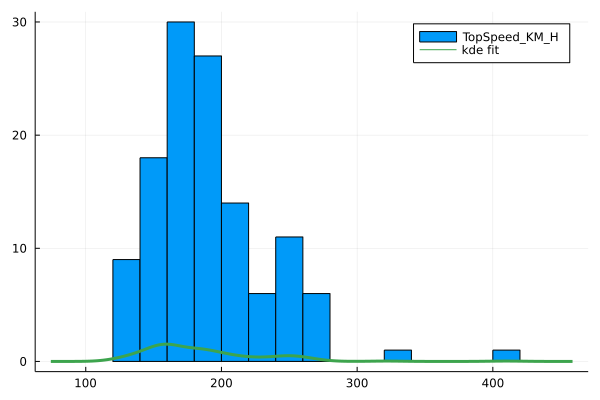

In [443]:
histogram(choles,label="TopSpeed_KM_H")
plot!(p.x,p.density .* length(choles), linewidth=3,color=3,label="kde fit") 

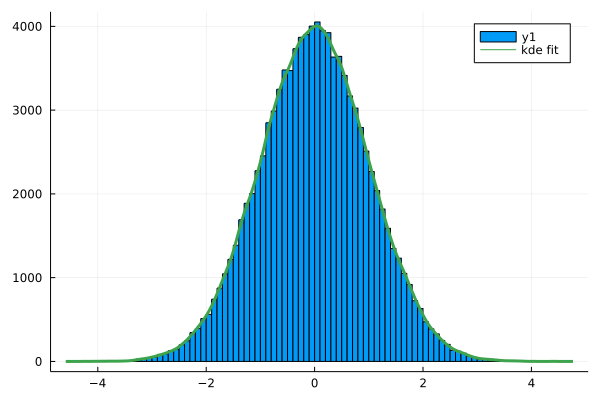

In [444]:
d = Normal()
myrandomvector = rand(d,100000)
histogram(myrandomvector)
p=kde(myrandomvector)
plot!(p.x,p.density .* length(myrandomvector) .*0.1, linewidth=3,color=3,label="kde fit") 

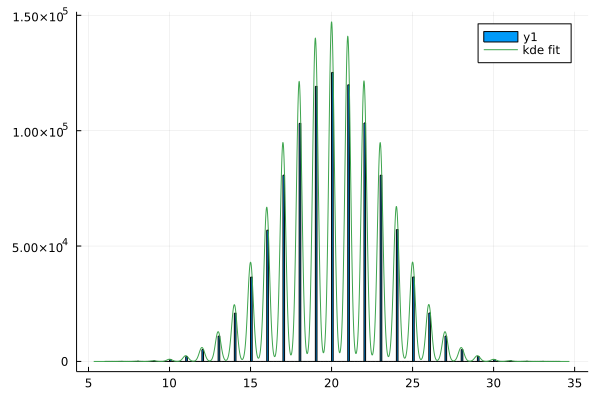

In [445]:
b = Binomial(40) 
myrandomvector = rand(b,1000000)
histogram(myrandomvector)
p=kde(myrandomvector)
plot!(p.x,p.density .* length(myrandomvector) .*0.5,color=3,label="kde fit")

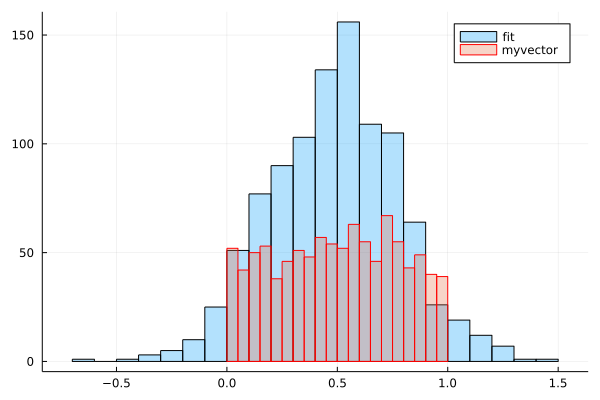

In [446]:
x = rand(1000)
d = fit(Normal, x)
myrandomvector = rand(d,1000)
histogram(myrandomvector,nbins=20,fillalpha=0.3,label="fit")
histogram!(x,nbins=20,linecolor = :red,fillalpha=0.3,label="myvector")

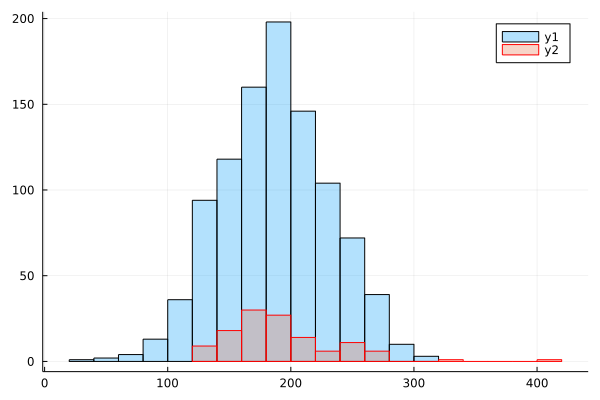

In [447]:
x = choles
d = fit(Normal, x)
myrandomvector = rand(d,1000)
histogram(myrandomvector,nbins=20,fillalpha=0.3)
histogram!(x,nbins=20,linecolor = :red,fillalpha=0.3)

## One Sample Test

In [448]:
myrandomvector = randn(1000)
OneSampleTTest(myrandomvector)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          -0.0194921
    95% confidence interval: (-0.08137, 0.04239)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.5366

Details:
    number of observations:   1000
    t-statistic:              -0.6181038452931343
    degrees of freedom:       999
    empirical standard error: 0.03153524995963762


In [449]:
OneSampleTTest(choles)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          186.276
    95% confidence interval: (178.5, 194.1)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-79

Details:
    number of observations:   123
    t-statistic:              47.158236908145355
    degrees of freedom:       122
    empirical standard error: 3.950029411130365


In [450]:
show(describe(elc,:all),allrows=true, allcols=true)

11×13 DataFrame
 Row │ variable             mean      std       min                          q25     median  q75     max                                nunique  nmissing  first                   last                          eltype   
     │ Symbol               Union…    Union…    Any                          Union…  Union…  Union…  Any                                Union…   Int64     Any                     Any                           DataType 
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ Name                                     Audi_Q4_Sportback_e-tron_35                          Volvo_XC40_Recharge_Twin_Pure_El…  123             0  Porsche_Taycan_Turbo_S  Peugeot_e-Rifter_Long_50_kWh  String63
   2 │ Acceleration_SEC     1.89431   0.624802  1                            1.5     2.0     2.0     3       

## DOĞRUSAL REGRESYON MODELİ TRAİN TEST

In [451]:
using Pkg  

Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("Plots")
Pkg.add("Lathe")
Pkg.add("GLM")
Pkg.add("StatsPlots")
Pkg.add("MLBase")
Pkg.add("Statistics")



using DataFrames
using CSV
using Plots
using Lathe
using GLM
using Statistics
using StatsPlots
using MLBase

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Chan

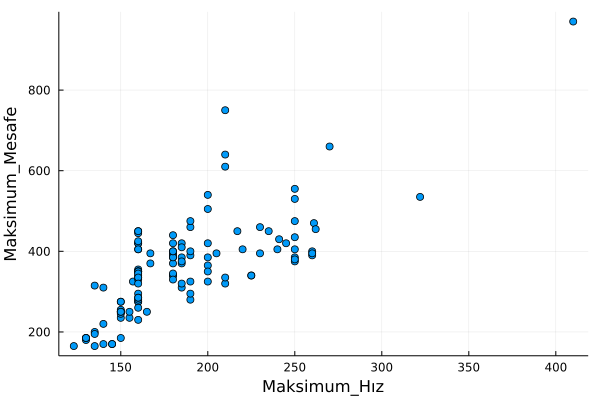

In [452]:
scatter(elc.TopSpeed_KM_H, elc.Range_H, xlabel="Maksimum_Hız", ylabel="Maksimum_Mesafe",legend=false)

### Grafiğe bakıldığında doğrusallıktan söz edemeyiz.

In [453]:
using Statistics
cor(elc.TopSpeed_KM_H, elc.Range_H)

0.7406161131989062

#### Maksimum hız değişkeni ile Maksimum mesafe değişkeni arasında %74 oranında doğrusallık vardır. Aralarında anlamlılık ilişkisi zayıf olduğu için yapacağımız analiz çok verimli olmayacaktır fakat uygulama gereği analizime devam ediyoruz.

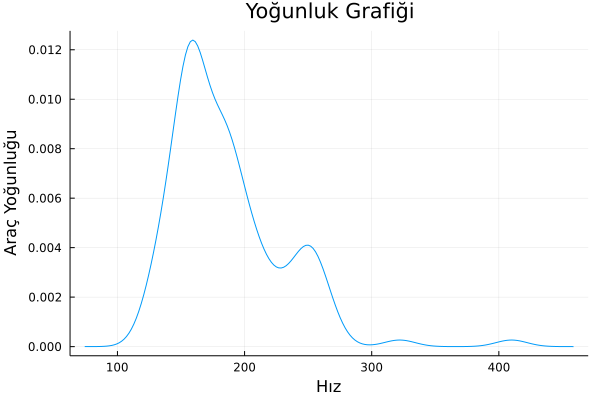

In [454]:
density(elc.TopSpeed_KM_H, title="Yoğunluk Grafiği", ylabel="Araç Yoğunluğu", xlabel="Hız",legend=false)

#### Grafiğe baktığımızda araçların yoğun bir kısmı 100-250 km hız yapabildiğini yorumlayabiliriz.

In [455]:
using Lathe.preprocess: TrainTestSplit
train,test=TrainTestSplit(elc,.70)

(83×11 DataFrame
 Row │ Name                               Acceleration_SEC  TopSpeed_KM_H  Ran ⋯
     │ String63                           Int64             Int64          Int ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Tesla_Roadster_                                   1            410      ⋯
   2 │ Tesla_Model_Y_Performance                         1            241
   3 │ Porsche_Taycan_4S                                 1            250
   4 │ Porsche_Taycan_4S_Plus                            1            250
   5 │ Tesla_Cybertruck_Dual_Motor                       1            190      ⋯
   6 │ Tesla_Cybertruck_Tri_Motor                        1            210
   7 │ Audi_e-tron_S_55_quattro                          1            210
   8 │ Audi_e-tron_S_Sportback_55_quatt…                 1            210
   9 │ Jaguar_I-Pace_EV400                               1            200      ⋯
  10 │ Lucid_Air_Touring                             

#### -> Bu kısımda train ve test için verimizi ikiye bölüyoruz.İlk böldüğümüz kısım %70 eğitim verisi(train), 2.kısım %30 test verisi olarak bölüyoruz.

In [762]:
using GLM
fm=@formula(TopSpeed_KM_H~Range_H)
linreg=lm(fm,train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

TopSpeed_KM_H ~ 1 + Range_H

Coefficients:
─────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)  85.7067     10.1701     8.43    <1e-11  65.4125    106.001
Range_H       0.269776    0.026577  10.15    <1e-14   0.216743    0.32281
─────────────────────────────────────────────────────────────────────────

#### -> Burada ise araç büyüklüğü ile elektrik tüketimini modelleştirdik.
#### -> Değişkenlerimizin sig değerleri 0.05 den küçük olduğu için modelimiz anlamlı diyebiliriz.

### R2 Değeri

In [763]:
r2(linreg)

0.602426514456507

#### -> R2 değerine göre aracın alıcağı maksimum mesafe aracın maksimum hızının %60 lik kısmını açıklayabiliyor.

### Tahmin etme

In [764]:
test_pred=predict(linreg,test)
train_pred=predict(linreg,train)

70-element Vector{Union{Missing, Float64}}:
 194.96616434728725
 347.3898432553842
 201.71057491844198
 193.6172822330563
 288.0390302292226
 172.03516840536116
 228.6882172030609
 231.3859814315228
 212.50163183228955
 208.4549854895967
 199.01281068998009
 177.43069686228495
 189.57063589036346
   ⋮
 180.12846109074684
 200.36169280421103
 194.96616434728725
 189.57063589036346
 177.43069686228495
 193.6172822330563
 180.12846109074684
 170.68628629113022
 172.03516840536116
 135.6153513211256
 139.66199766381843
 138.31311554958748

#### -> Bu kısımda test ve orjinal verimini gözlemliyoruz.

In [765]:
perf_test=DataFrame(y_original=test[!,:TopSpeed_KM_H],y_pred=test_pred)

,y_original,y_pred
,Int64,Float64?
1,260,190.92
2,250,186.873
3,250,203.059
4,190,209.804
5,210,176.082
6,200,184.175
7,270,263.759
8,250,235.433
9,322,230.037


#### -> Maksimum hız için gerçek ve tahmin testimizin verileri yukarıda gibidir.

In [766]:
perf_test.hata=perf_test[!,:y_original]-perf_test[!,:y_pred]

53-element Vector{Float64}:
  69.08048199540559
  63.12712833809843
  46.940542967327076
 -19.803867603827655
  33.918185251946
  15.824892566560322
   6.240847826934441
  14.567372225784368
  91.96290068270815
  36.14948605347951
  45.03383565271275
  61.778246223867484
  67.73159988117465
   ⋮
  15.66259582310073
 -11.315046461518193
 -48.363623716141774
 -13.6172822330563
 -18.779578976515893
 -47.10610337536576
 -16.081814748054
  -7.219822864201802
  -5.615351321125587
  -4.266469206894641
  -5.615351321125587
  -2.5929936057445104

#### -> Bu tabloda ise performans testimizin hatasını gözlemiyoruz.

In [767]:
perf_test.hata_kare=perf_test.hata.*perf_test.hata

53-element Vector{Float64}:
 4772.112992717556
 3985.03433221475
 2203.4145740674794
  392.1931720699345
 1150.443290785327
  250.42722474317614
   38.94818159895234
  212.2083335645538
 8457.175101977644
 1306.7853419307094
 2028.0463535955423
 3816.551706496797
 4587.569622463538
    ⋮
  245.31690791781244
  128.0302764263154
 2339.040098956551
  185.4303754147108
  352.6725865351977
 2218.9849752106456
  258.6247655907272
   52.12584219045112
   31.532170459666876
   18.202759493380185
   31.532170459666876
    6.723615839431917

#### -> Bu tabloda performans testimizin hata karelerini gözlemliyoruz.

In [768]:
perf_test

,y_original,y_pred,hata,hata_kare
,Int64,Float64?,Float64,Float64
1,260,190.92,69.0805,4772.11
2,250,186.873,63.1271,3985.03
3,250,203.059,46.9405,2203.41
4,190,209.804,-19.8039,392.193
5,210,176.082,33.9182,1150.44
6,200,184.175,15.8249,250.427
7,270,263.759,6.24085,38.9482
8,250,235.433,14.5674,212.208
9,322,230.037,91.9629,8457.18


#### -> Yukarıdaki tablomuz tahmin ettiğimiz performans testi, hata ve hata kare testlerini orjinal test gözlemleriyle tablolaştırılmış halini gözlemliyoruz.

In [769]:
perf_train=DataFrame(y_original=train[!,:TopSpeed_KM_H],y_pred=train_pred)

,y_original,y_pred
,Int64,Float64?
1,250,194.966
2,410,347.39
3,241,201.711
4,260,193.617
5,210,288.039
6,210,172.035
7,250,228.688
8,200,231.386
9,261,212.502


#### -> Bu kısımda train ve orjinal verimizi gözlemliyoruz.

In [770]:
perf_train.hata=perf_train[!,:y_original]-perf_train[!,:y_pred]

70-element Vector{Float64}:
  55.03383565271275
  62.61015674461578
  39.28942508155802
  66.3827177669437
 -78.03903022922259
  37.96483159463884
  21.3117827969391
 -31.385981431522794
  48.49836816771045
  53.54501451040329
  45.987189310019915
   2.5693031377150533
  60.42936410963654
   ⋮
 -20.12846109074684
 -40.36169280421103
 -34.96616434728725
  -9.570635890363462
 -17.430696862284947
 -13.6172822330563
 -20.12846109074684
 -35.686286291130216
 -12.035168405361162
  -5.615351321125587
  -4.6619976638184255
  -3.3131155495874793

#### -> Bu kısımda eğitim verimizin hatalarını gözlemliyoruz.

In [771]:
perf_train.hata_kare=perf_train.hata.*perf_train.hata

70-element Vector{Float64}:
 3028.723066649797
 3920.0317275853567
 1543.6589232393605
 4406.665218125702
 6090.090239117517
 1441.3284380092873
  454.1920859839093
  985.0798304198936
 2352.0917149307907
 2867.068578919299
 2114.8215806356097
    6.601318613472418
 3651.7080466950283
    ⋮
  405.1549458817094
 1629.0662460215005
 1222.6326491615018
   91.59707134591322
  303.8291931048703
  185.4303754147108
  405.1549458817094
 1273.5110292525085
  144.84527854540354
   31.532170459666876
   21.73422221744846
   10.976734644918345

#### -> Bu tabloda ise eğitim testimizin hata karelerini gözlemiyoruz.

In [772]:
perf_train

,y_original,y_pred,hata,hata_kare
,Int64,Float64?,Float64,Float64
1,250,194.966,55.0338,3028.72
2,410,347.39,62.6102,3920.03
3,241,201.711,39.2894,1543.66
4,260,193.617,66.3827,4406.67
5,210,288.039,-78.039,6090.09
6,210,172.035,37.9648,1441.33
7,250,228.688,21.3118,454.192
8,200,231.386,-31.386,985.08
9,261,212.502,48.4984,2352.09


#### -> Yukarıdaki tablomuzda tahmin için yaptığımız eğitim testleriminiz tahmin, hata ve hata kare testlerini orjinal test gözlemleriyle tablolaştırılmış halini gözlemliyoruz.

### Performans Ölçümü

In [467]:
function mape(perf_df)
    mape=mean(abs.(perf_df.hata./perf_df.y_original))
    return mape
end

mape (generic function with 1 method)

In [468]:
mape(perf_test)

0.10195361385291182

In [469]:
mape(perf_train)

0.12004397477926242

### RMSE

In [470]:
function rmse(perf_df)
    rmse=sqrt(mean(perf_df.hata.*perf_df.hata))
    return rmse
end

rmse (generic function with 1 method)

### HATA ANALİZİ

In [471]:
println("Ortalama Mutlak Test Hatası: ",mean(abs.(perf_test.hata)))
println("Ortalama Mutlak Yüzde Test Hatası: ",mape(perf_test))
println("Kök Ortalama Kare Test Hatası: ", rmse(perf_test))
println("Hata Kareleri Ortalaması Test Hatası: ", mean(perf_test.hata_kare))

Ortalama Mutlak Test Hatası: 19.077908236898036
Ortalama Mutlak Yüzde Test Hatası: 0.10195361385291182
Kök Ortalama Kare Test Hatası: 25.69719608158921
Hata Kareleri Ortalaması Test Hatası: 660.345886455644


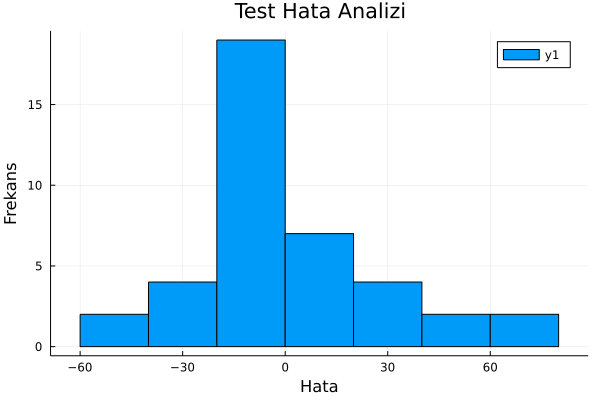

In [472]:
histogram(perf_test.hata,title="Test Hata Analizi",ylabel="Frekans",xlabel="Hata",legend=true)

In [473]:
println("Ortalama Mutlak Train Hatası: ",mean(abs.(perf_train.hata)))
println("Ortalama Mutlak Yüzde Train Hatası: ",mape(perf_train))
println("Kök Ortalama Kare Train Hatası: ", rmse(perf_train))
println("Hata Kareleri Ortalaması Train Hatası: ", mean(perf_train.hata_kare))

Ortalama Mutlak Train Hatası: 24.06202756140311
Ortalama Mutlak Yüzde Train Hatası: 0.12004397477926242
Kök Ortalama Kare Train Hatası: 30.93436852494506
Hata Kareleri Ortalaması Train Hatası: 956.9351560371117


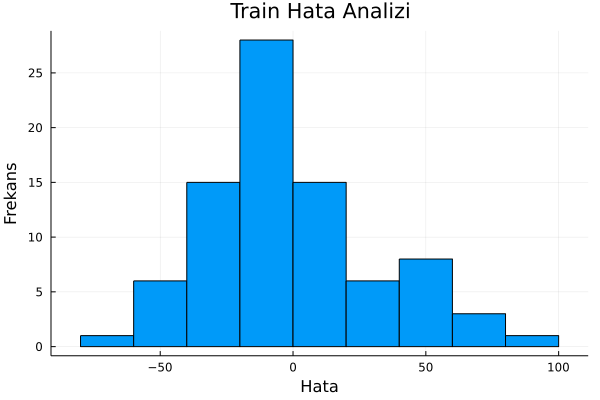

In [474]:
histogram(perf_train.hata,title="Train Hata Analizi",ylabel="Frekans",xlabel="Hata",legend=false)

#### Yukarıdaki tablolarda tahmin testlerimizin hatalarını gözlemliyoruz

In [475]:
train

,Name,Acceleration_SEC,TopSpeed_KM_H,Range_H
,String63,Int64,Int64,Int64
1,Tesla_Roadster_,1,410,970
2,Tesla_Model_Y_Performance,1,241,430
3,Porsche_Taycan_4S,1,250,375
4,Porsche_Taycan_4S_Plus,1,250,435
5,Tesla_Cybertruck_Dual_Motor,1,190,460
6,Tesla_Cybertruck_Tri_Motor,1,210,750
7,Audi_e-tron_S_55_quattro,1,210,320
8,Audi_e-tron_S_Sportback_55_quattro,1,210,335
9,Jaguar_I-Pace_EV400,1,200,365


In [650]:
function cross_validation(elc,k,fm)
    a=collect(Kfold(size(elc)[1],k))
    for i in 1:k
        row=a[i]
        temp_train=elc[row,:]
        temp_test=elc[setdiff(1:end,row),:]
        linreg=lm(fm,temp_train)
        perf_test=DataFrame(y_original=temp_test[!,:TopSpeed_KM_H],y_pred=GLM.predict(linreg,temp_test))
        perf_test.hata=perf_test[!,:y_original]-perf_test[!,:y_pred]
        println("$i. set için ortalama hata: ",mean(abs.(perf_test.hata)))
    end
end

cross_validation (generic function with 1 method)

In [651]:
size(elc)[1]

123

In [652]:
fm

FormulaTerm
Response:
  NumberofSeats(unknown)
Predictors:
  TopSpeed_KM_H(unknown)
  Range_H(unknown)
  Efficiency_WH_KM(unknown)
  FastChargeSpeed(unknown)
  PriceinGermany_EURO(unknown)

In [653]:
a=collect(Kfold(size(elc)[1],10))
a[1]

111-element Vector{Int64}:
   1
   2
   3
   4
   7
   8
   9
  10
  11
  12
  13
  14
  15
   ⋮
 112
 113
 114
 115
 116
 117
 118
 119
 120
 121
 122
 123

In [654]:
cross_validation(elc,10,fm)

1. set için ortalama hata: 154.3717262925003
2. set için ortalama hata: 169.31454544354
3. set için ortalama hata: 187.3419938054183
4. set için ortalama hata: 186.57743202344614
5. set için ortalama hata: 203.21501001645328
6. set için ortalama hata: 185.3685633114162
7. set için ortalama hata: 215.67726877244183
8. set için ortalama hata: 180.3557701168195
9. set için ortalama hata: 192.58811358244395
10. set için ortalama hata: 182.06602086253676


## Çoklu Doğrusal Regresyon

#### Bu kısımda ise Maksimum hız, Maksimum mesafe, Çekiş sistemi, Maksimum hızlanma derecesine göre çoklu doğrusal regresyon modeli oluşturup analiz edeceğiz.

In [760]:
using GLM
fm1=@formula(TopSpeed_KM_H ~ Range_H + Acceleration_SEC)
linreg1=lm(fm1,train)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

TopSpeed_KM_H ~ 1 + Range_H + Acceleration_SEC

Coefficients:
─────────────────────────────────────────────────────────────────────────────────
                       Coef.  Std. Error      t  Pr(>|t|)   Lower 95%   Upper 95%
─────────────────────────────────────────────────────────────────────────────────
(Intercept)       156.301     18.569       8.42    <1e-11  119.237     193.365
Range_H             0.207082   0.0276809   7.48    <1e-09    0.151831    0.262334
Acceleration_SEC  -25.2006     5.78895    -4.35    <1e-04  -36.7554    -13.6458
─────────────────────────────────────────────────────────────────────────────────

#### -> Çoklu doğrusal regresyon modelimizde Maksimum hız değişkenimizi, maksimum mesafe ve hız seviyesini ile test edeceğiz.
#### -> İki değişkenimiz içinde sig değeri 0.05 den küçük olduğu için modelimiz anlamlıdır diyebiliriz.

In [481]:
r2(linreg1)

0.6630857740818761

#### R2 değerimize bakıldığında değişkenlerimiz maksimum hız değişkenimizi %66 oranında açıklıyor.

In [482]:
test_pred1=predict(linreg1,test)
train_pred1=predict(linreg1,train)

83-element Vector{Union{Missing, Float64}}:
 330.0409072572987
 228.15709092980063
 217.78003556311103
 229.1004595994997
 233.81730294799496
 288.53268579054026
 207.4029801964214
 210.23308620551856
 215.89329822371292
 247.02446432378179
 234.9235764639737
 251.74130767227706
 247.96783299348084
   ⋮
 180.4881774971519
 183.87142026423842
 171.3344746758848
 160.0140506394961
 171.3344746758848
 147.91316277968807
 166.7805361736692
 120.00233460042604
 122.8324406095232
 123.77580927922226
 135.64937007360032
 125.66254661862042

#### -> Bu kısımda train ve test verimizi gözlemliyoruz.

In [483]:
perf_test1=DataFrame(y_original=test[!,:TopSpeed_KM_H],y_pred=test_pred1)

,y_original,y_pred
,Int64,Float64?
1,260,220.61
2,250,223.44
3,260,222.497
4,270,271.552
5,261,235.704
6,250,236.647
7,180,211.176
8,235,231.931
9,180,180.098


#### -> Maksimum hız için gerçek ve tahmin testimizin verileri yukarıda gibidir.

In [484]:
perf_test1.hata=perf_test1[!,:y_original]-perf_test1[!,:y_pred]

40-element Vector{Float64}:
  39.38985842779181
  26.559752418694643
  37.5031210883937
  -1.5520497359572119
  25.2959597126069
  13.352591042907846
 -31.176454875217615
   3.069434391403149
  -0.09794558544220422
 -18.771334148656592
 -11.620804103170741
   5.46690721161724
   0.6561651479370312
   ⋮
  -6.255464775551218
   0.6429886029170007
  -6.620804103170741
 -34.63870754263772
  11.495631333212373
  13.030205890011018
   7.923130629806053
 -13.303394691397727
  10.753236638903218
   6.224190720777742
   6.224190720777742
   8.394084711680563

#### -> Bu tabloda ise performans testimizin hatasını gözlemiyoruz.

In [485]:
perf_test1.hata_kare=perf_test1.hata.*perf_test1.hata

40-element Vector{Float64}:
 1551.5609469614812
  705.420448542356
 1406.48409137072
    2.408858382884851
  639.8855777818314
  178.29168755914284
  971.9713385864802
    9.42142748312842
    0.009593337707616128
  352.3629857205211
  135.04308800426992
   29.887074460432586
    0.430552701367226
    ⋮
   39.130839558162045
    0.4134343434811564
   43.83504697256252
 1199.8400602243871
  132.14953974913408
  169.78626553607782
   62.77599897697086
  176.98031031510925
  115.63209821225057
   38.740550128615745
   38.740550128615745
   70.46065814686936

#### -> Bu tabloda performans testimizin hata karelerini gözlemliyoruz.

In [486]:
perf_test1

,y_original,y_pred,hata,hata_kare
,Int64,Float64?,Float64,Float64
1,260,220.61,39.3899,1551.56
2,250,223.44,26.5598,705.42
3,260,222.497,37.5031,1406.48
4,270,271.552,-1.55205,2.40886
5,261,235.704,25.296,639.886
6,250,236.647,13.3526,178.292
7,180,211.176,-31.1765,971.971
8,235,231.931,3.06943,9.42143
9,180,180.098,-0.0979456,0.00959334


#### -> Yukarıdaki tablomuz önceki oluşturduğumuz  tahmin, hata ve hata kare testlerini orjinal test gözlemleriyle tablolaştırılmış halini gözlemliyoruz.

In [487]:
perf_train1=DataFrame(y_original=train[!,:TopSpeed_KM_H],y_pred=train_pred)

,y_original,y_pred
,Int64,Float64?
1,410,346.293
2,241,204.157
3,250,189.68
4,250,205.473
5,190,212.054
6,210,288.386
7,210,175.203
8,210,179.152
9,200,187.048


In [488]:
perf_train1.hata=perf_train[!,:y_original]-perf_train[!,:y_pred]

83-element Vector{Float64}:
  63.706518902741266
  36.84284017744454
  60.31968771468283
  44.5267631286047
 -22.05362211559452
 -78.38609094830554
  34.796535251921114
  30.84830410540161
  12.951841812362545
  19.521299200647633
 -33.110854897032056
  12.940913956448412
  90.20522215180779
   ⋮
 -23.09992704111795
 -37.576774578356236
 -16.260697529516392
 -20.467772943438263
 -16.260697529516392
 -23.09992704111795
 -49.42146801791483
 -11.405076234043662
  -8.353307380563194
  -9.669384429403038
  -5.990925406199949
  -7.301538527082755

In [489]:
perf_train1.hata_kare=perf_train1.hata.*perf_train1.hata

83-element Vector{Float64}:
 4058.52055070533
 1357.3948723407218
 3638.4647259968588
 1982.632634710871
  486.3622484174398
 6144.379254156027
 1210.7988655381887
  951.6178661793379
  167.7502063324627
  381.0811224812059
 1096.3287120123116
  167.4672540282013
 8136.982103456995
    ⋮
  533.6066293049723
 1412.0139877125996
  264.4102841464205
  418.9297292641434
  264.4102841464205
  533.6066293049723
 2442.4815010457787
  130.07576390434755
   69.77774419417153
   93.49699524358192
   35.89118722265202
   53.31246486247381

In [490]:
perf_train1

,y_original,y_pred,hata,hata_kare
,Int64,Float64?,Float64,Float64
1,410,346.293,63.7065,4058.52
2,241,204.157,36.8428,1357.39
3,250,189.68,60.3197,3638.46
4,250,205.473,44.5268,1982.63
5,190,212.054,-22.0536,486.362
6,210,288.386,-78.3861,6144.38
7,210,175.203,34.7965,1210.8
8,210,179.152,30.8483,951.618
9,200,187.048,12.9518,167.75


#### Test hatası karşılaştırması

In [491]:
println("Ortalama Mutlak Test Hatası: ",mean(abs.(perf_test1.hata)))
println("Ortalama Mutlak Yüzde Test Hatası: ",mape(perf_test1))
println("Kök Ortalama Kare Test Hatası: ", rmse(perf_test1))
println("Hata Kareleri Ortalaması Test Hatası: ", mean(perf_test1.hata_kare))

Ortalama Mutlak Test Hatası: 13.734804898635554
Ortalama Mutlak Yüzde Test Hatası: 0.07577702412394924
Kök Ortalama Kare Test Hatası: 17.286744731354442
Hata Kareleri Ortalaması Test Hatası: 298.83154340701054


#### Test Hata dağılımı

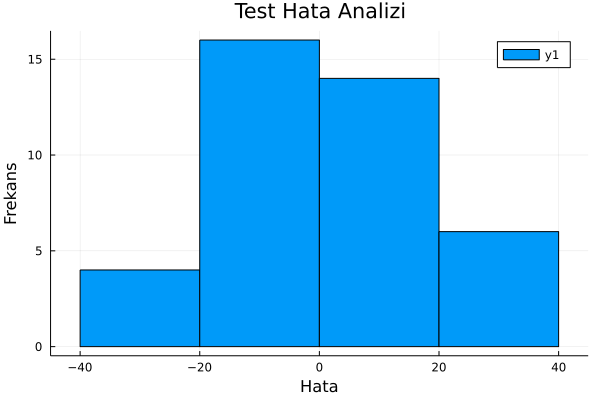

In [492]:
histogram(perf_test1.hata,title="Test Hata Analizi",ylabel="Frekans",xlabel="Hata",legend=true)

In [493]:
println("Ortalama Mutlak Train Hatası: ",mean(abs.(perf_train1.hata)))
println("Ortalama Mutlak Yüzde Train Hatası: ",mape(perf_train1))
println("Kök Ortalama Kare Train Hatası: ", rmse(perf_train1))
println("Hata Kareleri Ortalaması Train Hatası: ", mean(perf_train1.hata_kare))

Ortalama Mutlak Train Hatası: 24.06202756140311
Ortalama Mutlak Yüzde Train Hatası: 0.12004397477926242
Kök Ortalama Kare Train Hatası: 30.93436852494506
Hata Kareleri Ortalaması Train Hatası: 956.9351560371117


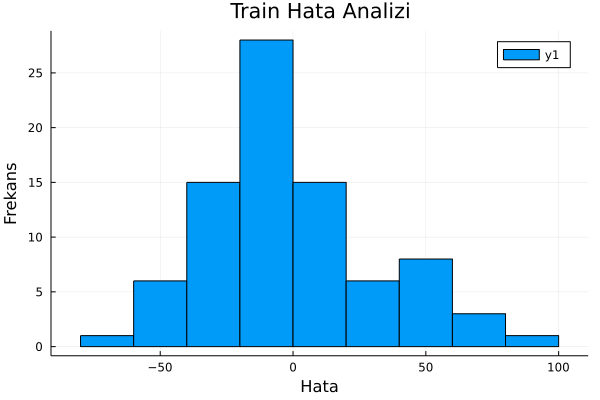

In [494]:

histogram(perf_train1.hata,title="Train Hata Analizi",ylabel="Frekans",xlabel="Hata",legend=true)

In [655]:
cross_validation(elc,10,fm1)

1. set için ortalama hata: 16.260969372708963
2. set için ortalama hata: 15.554728017343061
3. set için ortalama hata: 16.061744207221498
4. set için ortalama hata: 18.7669856750903
5. set için ortalama hata: 28.475561513853354
6. set için ortalama hata: 11.612850279135394
7. set için ortalama hata: 17.003324761621126
8. set için ortalama hata: 20.50792922001038
9. set için ortalama hata: 20.81556317462758
10. set için ortalama hata: 16.527862368224717


## Lojistik Regresyon

### Sınıflandırma

#### Araç boyutu değişkenine dağılım dengesine bakalım.

In [670]:
Pkg.add("FreqTables")
using FreqTables
classes=freqtable(elc.NumberofSeats)


   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


2-element Named Vector{Int64}
Dim1  │ 
──────┼───
0     │ 58
1     │ 65

#### -> Araç yükseliğine ait değişkenin frekansı yukarıda verildiği gibidir.Gruplar arası gözlemlerin düzenli dağıldığını gözlemliyoruz ve analize devam ediyoruz.

### Build Model

In [671]:
using Lathe.preprocess:TrainTestSplit
train,test=TrainTestSplit(elc,.70)

(89×11 DataFrame
 Row │ Name                               Acceleration_SEC  TopSpeed_KM_H  Ran ⋯
     │ String63                           Int64             Int64          Int ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Porsche_Taycan_Turbo_S                            1            260      ⋯
   2 │ Audi_e-tron_GT_RS                                 1            250
   3 │ Tesla_Model_Y_Performance                         1            241
   4 │ Porsche_Taycan_Turbo                              1            260
   5 │ Porsche_Taycan_4S                                 1            250      ⋯
   6 │ Audi_e-tron_S_55_quattro                          1            210
   7 │ Jaguar_I-Pace_EV400                               1            200
   8 │ Lucid_Air_Grand_Touring                           1            270
   9 │ Lucid_Air_Touring                                 1            250      ⋯
  10 │ Lucid_Air_Pure                                

#### -> Bu kısımda train ve test için verimizi ikiye bölüyoruz.İlk böldüğümüz kısım %70 eğitim verisi(train), 2.kısım %30 test verisi olarak bölüyoruz.

In [758]:
fm=@formula(NumberofSeats~TopSpeed_KM_H+Range_H+Efficiency_WH_KM+FastChargeSpeed+PriceinGermany_EURO )
logit=glm(fm,train,Binomial(),LogitLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, LogitLink}, GLM.DensePredChol{Float64, Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

NumberofSeats ~ 1 + TopSpeed_KM_H + Range_H + Efficiency_WH_KM + FastChargeSpeed + PriceinGermany_EURO

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────
                           Coef.  Std. Error      z  Pr(>|z|)    Lower 95%    Upper 95%
───────────────────────────────────────────────────────────────────────────────────────
(Intercept)           6.76038     3.24768      2.08    0.0374   0.395042    13.1257
TopSpeed_KM_H         0.00363973  0.0163748    0.22    0.8241  -0.0284543    0.0357337
Range_H              -0.00799644  0.00489891  -1.63    0.1026  -0.0175981    0.00160525
Efficiency_WH_KM     -0.0389542   0.013307    -2.93    0.0034  -0.0650354   -0.0128729
FastChargeSpeed       0.00144625  0.00171298   0.84    0.3985  -0.0019111

#### -> Modelimizde NumberofSeats(Araç yüksekliğine) bağımlı değişkenimiz ile maksimum hız, maksimum mesafe, yakıt tüketimi, sarj hızı ve almanya satış fiyatı bağımsız değişkenlerimiz ile lojistik regresyon modelimizi kurduk. 
#### -> Tabloya baktığımızda modelimizde Range_H ve Efficiency_WH_H değişkenlerimizin 0.05 den küçük ve modelimiz için anlamlı olduğunu gözlemliyoruz.

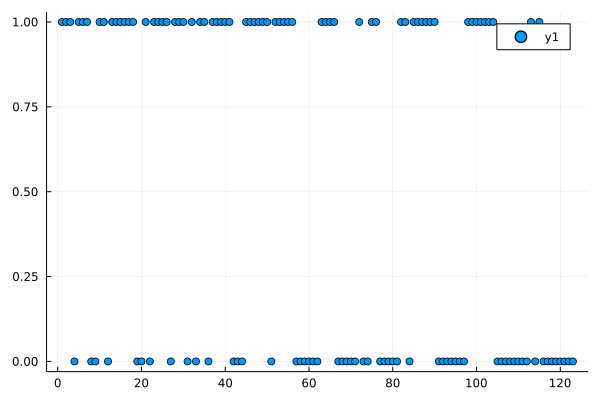

In [497]:
using Plots
scatter(elc[!,:NumberofSeats])

#### Saçılım grafiğine baktığımızda değişkenimizin 0 ve 1 ler arasında dağıldığını gözlemliyoruz.

In [498]:
predictions=predict(logit,test)

39-element Vector{Union{Missing, Float64}}:
 0.8977789597841382
 0.8970644229426922
 0.09805754333952335
 0.9309427875286104
 0.8608899493593271
 0.8095865268841528
 0.343600767743339
 0.5154178554358205
 0.7287609334307135
 0.6988963654136465
 0.6738408227324472
 0.4821834830643458
 0.4186103408624244
 ⋮
 0.8599249659852288
 0.7732254443197567
 0.48839036595149676
 0.6891941182116809
 0.6097475624039354
 0.7254587800744222
 0.5866890982090599
 0.5231952167351511
 0.3914783409016505
 0.397524037976793
 0.24445803209363015
 0.2664221979595757

#### -> Lojistik regresyon modelimizde test verisindeki bağımsız değişkenlerin değerlerini kullanarak 39 tane bağımlı değişken tahmininde bulunuyoruz.

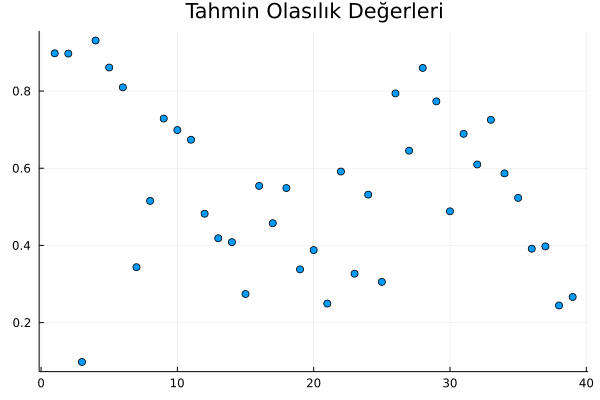

In [499]:
scatter(predictions, title="Tahmin Olasılık Değerleri",legend=false)

#### -> Tahmin ettiğimiz değerler tabloda görüldüğü gibi 0-1 aralığında dağıldığını gözlemliyoruz.

In [500]:
prediction_class=[if x<0.5 0 else 1 end for x in predictions]

39-element Vector{Int64}:
 1
 1
 0
 1
 1
 1
 0
 1
 1
 1
 1
 0
 0
 ⋮
 1
 1
 0
 1
 1
 1
 1
 1
 0
 0
 0
 0

#### -> Kodumuzda 0.5 den küçük değerleri 0 grubuna atıyoruz değilse 1 grubuna atama yapıyoruz.

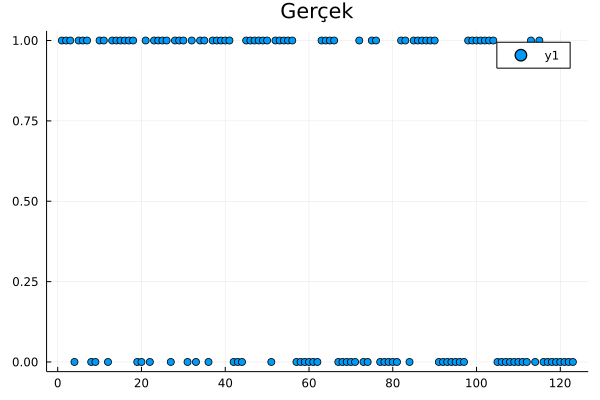

In [501]:
scatter(elc[!,:NumberofSeats], title="Gerçek")

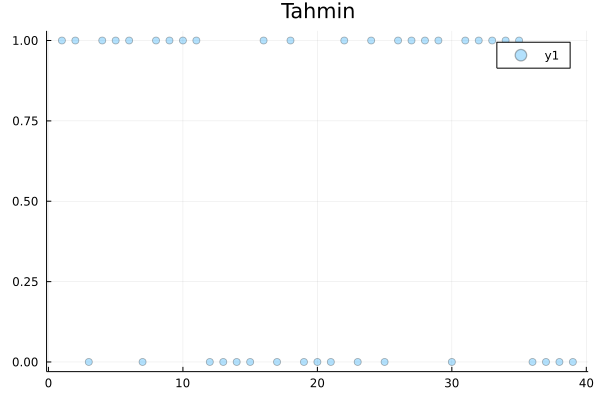

In [502]:
scatter(prediction_class, opacity=0.3, title="Tahmin")

#### -> Yukarıdaki tablolara bakılarak gerçek ve tahmini değelerimizin saçılımın grafiğinde dağılımlarını gözlemiyoruz.

In [503]:
prediction_elc=DataFrame(y_actual=test.NumberofSeats,prob_predicted=predictions,y_predicted=prediction_class)

,y_actual,prob_predicted,y_predicted
,Int64,Float64?,Int64
1,1,0.897779,1
2,1,0.897064,1
3,0,0.0980575,0
4,1,0.930943,1
5,1,0.86089,1
6,1,0.809587,1
7,0,0.343601,0
8,0,0.515418,1
9,1,0.728761,1


#### -> Sol kısım gerçek değerler sağ kısım ise tahmin değerleri.
#### -> Yukarıdaki tabloda gördüğümüz 30 gözlemden 7 tanesi yanlış tahmin edilmiştir yani %23 kısmını yanlış tahmin etmiş olduğunu gözlemliyoruz. 

In [504]:
confusion_matrix=MLBase.roc(prediction_elc.y_actual,prediction_elc.y_predicted)

ROCNums{Int64}
  p = 18
  n = 21
  tp = 15
  tn = 14
  fp = 7
  fn = 3


#### -> Gerçek verilerimiz : 18 pozitif, 21 negatif
#### -> Tahmin verilerimiz : 15 pozitif, 14 negatif
#### -> 7 tanesini false-pozitif tahmini, 3 tanesini false-negatif tahmini yapmış.

In [505]:
accuracy(cm)=(cm.tp+cm.tn)/(cm.tp+cm.tn+cm.fp+cm.fn)

accuracy (generic function with 1 method)

In [506]:
specificity(cm)=cm.tn/(cm.tn+cm.fp)

specificity (generic function with 1 method)

In [507]:
precision(cm)=cm.tp/(cm.tp+cm.fp)

precision (generic function with 1 method)

In [508]:
recall(cm)=cm.tp/(cm.tp+cm.fn)

recall (generic function with 1 method)

In [509]:
F1score(cm)=2*cm.tp/(2*cm.tp+cm.fp+cm.fn)

F1score (generic function with 1 method)

In [510]:
println("Accuracy: ",accuracy(confusion_matrix))
println("Specificity: ",specificity(confusion_matrix))
println("Precision: ",precision(confusion_matrix))
println("Recall: ",recall(confusion_matrix))
println("F1Score: ",F1score(confusion_matrix))

Accuracy: 0.7435897435897436
Specificity: 0.6666666666666666
Precision: 0.6818181818181818
Recall: 0.8333333333333334
F1Score: 0.75


#### -> Yukarıdaki değerlerimize baktığımızda model tahminlemesinin oranlarını gözlemliyoruz. Skora bakıldığında %75 performans alınmış verimli bir model olduğu söylenemez fakat üzerinde çalışıldığında daha verimli sonuçlar alınabilir.

## KARAR AĞACI

In [511]:
using Pkg
Pkg.add("DecisionTree")
Pkg.add("CSV")
Pkg.add("DataFrames")

using DecisionTree
using CSV
using DataFrames

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


In [512]:
using Lathe.preprocess: TrainTestSplit
train,test=TrainTestSplit(elc,.60)

(75×11 DataFrame
 Row │ Name                               Acceleration_SEC  TopSpeed_KM_H  Ran ⋯
     │ String63                           Int64             Int64          Int ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Porsche_Taycan_Turbo                              1            260      ⋯
   2 │ Porsche_Taycan_4S                                 1            250
   3 │ Tesla_Cybertruck_Tri_Motor                        1            210
   4 │ Audi_e-tron_S_55_quattro                          1            210
   5 │ Audi_e-tron_S_Sportback_55_quatt…                 1            210      ⋯
   6 │ Jaguar_I-Pace_EV400                               1            200
   7 │ Lucid_Air_Touring                                 1            250
   8 │ Lucid_Air_Pure                                    1            200
   9 │ Tesla_Model_S_Plaid                               1            322      ⋯
  10 │ Tesla_Model_X_Long_Range                      

#### -> Bu kısımda train ve test için verimizi ikiye bölüyoruz.İlk böldüğümüz kısım %60 eğitim verisi(train), 2.kısım %40 test verisi olarak bölüyoruz.

#### Feature selection (Train)

In [734]:
features = Array(train[:,[:TopSpeed_KM_H, :Range_H, :PriceinGermany_EURO]])
labels = Array(train[:,:Number_of_Seats])
features = float.(features)
labels = string.(labels)

74-element Vector{String}:
 "Alçak_araç"
 "Yüksek_araç"
 "Alçak_araç"
 "Alçak_araç"
 "Alçak_araç"
 "Yüksek_araç"
 "Alçak_araç"
 "Alçak_araç"
 "Yüksek_araç"
 "Alçak_araç"
 "Alçak_araç"
 "Yüksek_araç"
 "Alçak_araç"
 ⋮
 "Alçak_araç"
 "Alçak_araç"
 "Yüksek_araç"
 "Yüksek_araç"
 "Yüksek_araç"
 "Yüksek_araç"
 "Yüksek_araç"
 "Yüksek_araç"
 "Yüksek_araç"
 "Yüksek_araç"
 "Yüksek_araç"
 "Yüksek_araç"

#### -> Bu kısımda train verimiz için seçtiğim bağımlı ve bağımsız değişkenlerimi karar ağacına göre atama yapıyoruz.

In [522]:
features_test = Array(test[:,[:TopSpeed_KM_H, :Range_H, :PriceinGermany_EURO]])
labels_test = Array(test[:,:Number_of_Seats])
features_test = float.(features_test)
labels_test = string.(labels_test)

48-element Vector{String}:
 "Alçak_araç"
 "Alçak_araç"
 "Alçak_araç"
 "Yüksek_araç"
 "Alçak_araç"
 "Yüksek_araç"
 "Alçak_araç"
 "Alçak_araç"
 "Alçak_araç"
 "Alçak_araç"
 "Yüksek_araç"
 "Alçak_araç"
 "Yüksek_araç"
 ⋮
 "Alçak_araç"
 "Yüksek_araç"
 "Yüksek_araç"
 "Yüksek_araç"
 "Yüksek_araç"
 "Yüksek_araç"
 "Alçak_araç"
 "Yüksek_araç"
 "Yüksek_araç"
 "Yüksek_araç"
 "Yüksek_araç"
 "Yüksek_araç"

#### -> Bu kısımda test verimiz için seçtiğim bağımlı ve bağımsız değişkenlerimi karar ağacına göre atama yapıyoruz.

## I.YOL
#### train depth-truncated classifier

In [658]:
Pkg.add("ScikitLearn")
using ScikitLearn: fit!

   Resolving package versions...
   Installed UnPack ────── v1.0.2
   Installed Parameters ── v0.12.3
   Installed ScikitLearn ─ v0.6.4
    Updating `~/.julia/environments/v1.6/Project.toml`
  [3646fa90] + ScikitLearn v0.6.4
    Updating `~/.julia/environments/v1.6/Manifest.toml`
  [d96e819e] + Parameters v0.12.3
  [3646fa90] + ScikitLearn v0.6.4
  [3a884ed6] + UnPack v1.0.2
Precompiling project...
  ✓ UnPack
  ✓ Parameters
  ✓ ScikitLearn
  3 dependencies successfully precompiled in 8 seconds (215 already precompiled)


In [659]:
model = DecisionTreeClassifier(max_depth=6)
fit!(model, features, labels)

DecisionTreeClassifier
max_depth:                6
min_samples_leaf:         1
min_samples_split:        2
min_purity_increase:      0.0
pruning_purity_threshold: 1.0
n_subfeatures:            0
classes:                  ["Alçak_araç", "Yüksek_araç"]
root:                     Decision Tree
Leaves: 10
Depth:  6

#### -> Bu kısımda verimizin derinliğine üst sınır koyuyoruz.
#### -> Çıktılarımızda ise her gözlem için yaprak oluştuğunu ve bir düğümün bölünmeden önce en az 2 örnek aldığını gözlemliyoruz.
#### -> Ağacımızda 10 yaprak ve 6 derinliğine sahip olduğunu gözlemliyoruz.

In [661]:
# pretty print of the tree, to a depth of 5 nodes (optional)
print_tree(model, 5)

Feature 3, Threshold 82.145
L-> Feature 3, Threshold 32.6
    L-> Alçak_araç : 8/8
    R-> Feature 1, Threshold 137.5
        L-> Yüksek_araç : 5/5
        R-> Feature 2, Threshold 242.5
            L-> Alçak_araç : 4/4
            R-> Feature 1, Threshold 182.5
                L-> 
                R-> 
R-> Feature 1, Threshold 261.0
    L-> Alçak_araç : 12/12
    R-> Feature 1, Threshold 292.0
        L-> Yüksek_araç : 1/1
        R-> Alçak_araç : 1/1


#### Bu kısımda yapraklara ulaşırken aşamaları vermiştir.
#### Feature göre sağ sol kısımlarının dallanma ve düğümlerini vermektedir.

In [663]:
# apply learned model
DecisionTree.predict(model, [5.9,3.0,5.1,1.9])

"Alçak_araç"

#### Yaptığım model alçak_araç grubunda girmektedir.

In [664]:
predict_proba(model, [5.9,3.0,5.1,1.9])

2-element Vector{Float64}:
 1.0
 0.0

#### %100 alçak_araç olduğunu yukarda tekrardan gözlemliyoruz.

In [665]:
println(get_classes(model)) # returns the ordering of the columns in predict_proba's output

["Alçak_araç", "Yüksek_araç"]


## Random Forest

In [739]:
#Random Forest
n_subfeatures=2;n_trees=10;partial_sampling=0.7;max_depth=-1;min_samples_leaf=5;min_samples_split=4;min_purity_increase=2.0
forest=build_forest(labels,features,n_subfeatures,n_trees,partial_sampling,min_samples_leaf,min_samples_split,min_purity_increase,rng=3)


Ensemble of Decision Trees
Trees:      10
Avg Leaves: 7.5
Avg Depth:  4.7

#### -> Yukarıda gördüğümüz gibi 10 tane karar ağacı oluşturulmuştur.
#### -> Yaprakların ortalaması 7,6 ve derinliği 4,6 olduğunu gözlemliyoruz.

In [740]:
accuracy=nfoldCV_forest(labels_test,features_test,3)

2×2 Matrix{Int64}:
 4  4
 3  5

2×2 Matrix{Int64}:
 2  2
 8  4

2×2 Matrix{Int64}:
 4  3
 7  2


Fold 1
Classes:  [0, 1]
Matrix:   
Accuracy: 0.5625
Kappa:    0.125

Fold 2
Classes:  [0, 1]
Matrix:   
Accuracy: 0.375
Kappa:    -0.1111111111111111

Fold 3
Classes:  [0, 1]
Matrix:   
Accuracy: 0.375
Kappa:    -0.19402985074626866

Mean Accuracy: 0.4375


LoadError: invalid redefinition of constant accuracy

#### -> 1.FOLD doğru tahmin oranı %56 dır verimli bir sonuç değil.
#### -> 2.FOLD doğru tahmin oranı %37 dür çokta verimli bir sonuç değil.
#### -> 3.FOLD doğru tahmin oranı %37 dür dikkate alınabilir fakat yinede yeterli değildir.
#### -> Ortalama doğruluk oranı %43 olduğunu gözlemliyoruz testimizin verimli olduğu söylenemez.

In [741]:
n_subfeatures=2;n_trees=30;partial_sampling=0.7;max_depth=-1;min_samples_leaf=2;min_samples_split=1;min_purity_increase=2
forest=build_forest(labels,features,n_subfeatures,n_trees,partial_sampling,min_samples_leaf,min_samples_split,min_purity_increase,rng=3)


Ensemble of Decision Trees
Trees:      30
Avg Leaves: 3.2666666666666666
Avg Depth:  2.0

#### -> Ağaç sayımızı 30 olarak arttırdığımızda yaprak ortalaması ve derinliğinin düştüğünü gözlemliyoruz.

In [742]:
accuracy1=nfoldCV_forest(labels_test,features_test,5)

2×2 Matrix{Int64}:
 2  2
 2  3

2×2 Matrix{Int64}:
 1  4
 2  2

2×2 Matrix{Int64}:
 4  0
 3  2

2×2 Matrix{Int64}:
 0  3
 3  3

2×2 Matrix{Int64}:
 2  2
 4  1


Fold 1
Classes:  [0, 1]
Matrix:   
Accuracy: 0.5555555555555556
Kappa:    0.1

Fold 2
Classes:  [0, 1]
Matrix:   
Accuracy: 0.3333333333333333
Kappa:    -0.28571428571428564

Fold 3
Classes:  [0, 1]
Matrix:   
Accuracy: 0.6666666666666666
Kappa:    0.3720930232558139

Fold 4
Classes:  [0, 1]
Matrix:   
Accuracy: 0.3333333333333333
Kappa:    -0.5000000000000001

Fold 5
Classes:  [0, 1]
Matrix:   
Accuracy: 0.3333333333333333
Kappa:    -0.28571428571428564

Mean Accuracy: 0.44444444444444436


5-element Vector{Float64}:
 0.5555555555555556
 0.3333333333333333
 0.6666666666666666
 0.3333333333333333
 0.3333333333333333

#### -> 1.Fold için doğru tahmin oranı %55.
#### -> 2.Fold için doğru tahmin oranı %33.
#### -> 3.Fold için doğru tahmin oranı %66.
#### -> 4.Fold için doğru tahmin oranı %33.
#### -> 5.Fold için doğru tahmin oranı %33.
#### -> Toplam ortalama doğru tahmin oranı ise %44 dür. Analizimin çok sağlıklı sonuçlar verdiğini söyleyemeyiz.

# k-Ortalama Kümeleme

In [530]:
using Pkg
Pkg.add("Clustering")
Pkg.add("Distances")
Pkg.add("Plots")
Pkg.add("CSV")

using CSV
using Clustering
using Distances
using Plots

   Resolving package versions...
    Updating `~/.julia/environments/v1.6/Project.toml`
  [aaaa29a8] + Clustering v0.14.2
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.6/Project.toml`
  [b4f34e82] + Distances v0.10.7
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


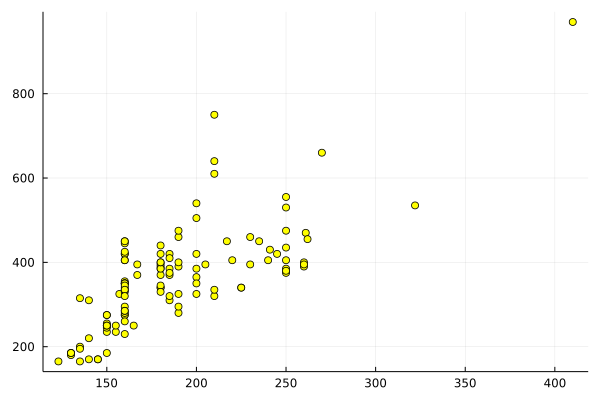

In [532]:
scatter(elc.TopSpeed_KM_H, elc.Range_H,color=:yellow, legend=false)

In [533]:
features = collect(Matrix(elc[:, 3:6])'); # features to use for clustering
k=3
result = kmeans(features, k, display=:iter) # run K-means for the 3 clusters

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       9.582490e+05
      1       7.212037e+05      -2.370453e+05 |        3
      2       6.830882e+05      -3.811559e+04 |        3
      3       6.597619e+05      -2.332621e+04 |        2
      4       6.538356e+05      -5.926303e+03 |        2
      5       6.536060e+05      -2.296049e+02 |        0
      6       6.536060e+05       0.000000e+00 |        0
K-means converged with 6 iterations (objv = 653606.0392857116)


KmeansResult{Matrix{Float64}, Float64, Int64}([155.72916666666666 201.81428571428572 262.0; 257.3958333333333 407.07142857142856 726.0; 189.33333333333334 193.52857142857144 197.0; 1.75 2.0285714285714285 1.8], [2, 2, 3, 2, 2, 2, 2, 2, 3, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [4138.9769387754495, 2598.4055102040875, 81521.04000000004, 2334.434081632644, 3675.89122448978, 3370.9483673469513, 3104.205510204076, 7494.348367346916, 8181.439999999944, 13373.278645833314  …  10431.528645833314, 4340.611979166628, 12341.861979166628, 8784.8203125, 10333.111979166657, 8783.8203125, 8783.8203125, 834.0703125, 4997.653645833343, 6060.611979166657], [48, 70, 5], [48, 70, 5], 653606.0392857116, 6, true)

In [534]:
result.centers

4×3 Matrix{Float64}:
 155.729  201.814    262.0
 257.396  407.071    726.0
 189.333  193.529    197.0
   1.75     2.02857    1.8

In [535]:
result.counts

3-element Vector{Int64}:
 48
 70
  5

In [536]:
result.assignments

123-element Vector{Int64}:
 2
 2
 3
 2
 2
 2
 2
 2
 3
 1
 2
 2
 3
 ⋮
 2
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

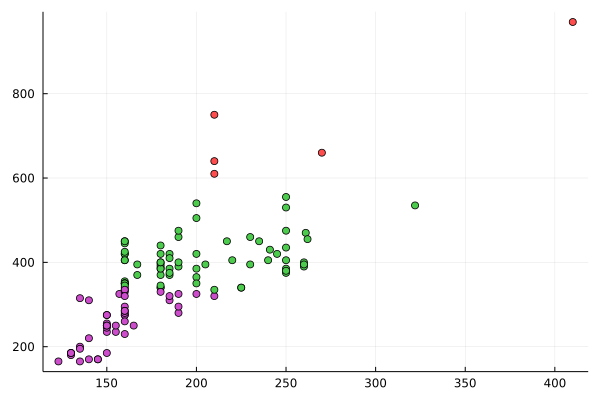

In [538]:
# plot with the point color mapped to the assigned cluster index
scatter(elc.TopSpeed_KM_H, elc.Range_H, marker_z=result.assignments,
        color=:lightrainbow, legend=false)

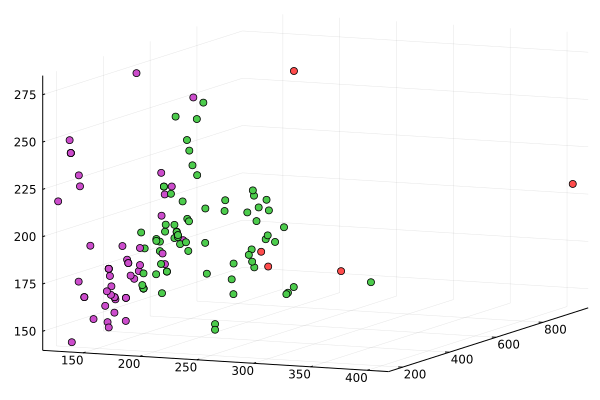

In [539]:
# plot with the point color mapped to the assigned cluster index
scatter(elc.TopSpeed_KM_H, elc.Range_H, elc.Efficiency_WH_KM, marker_z=result.assignments,
        color=:lightrainbow, legend=false)

In [673]:
features = collect(Matrix(elc[:, 3:6])'); # features to use for clustering
result = kmeans(features, 3, display=:iter)

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       1.131855e+06
      1       7.766187e+05      -3.552363e+05 |        3
      2       7.182969e+05      -5.832171e+04 |        2
      3       6.894037e+05      -2.889323e+04 |        3
      4       6.702464e+05      -1.915727e+04 |        3
      5       6.619201e+05      -8.326347e+03 |        2
      6       6.614616e+05      -4.585345e+02 |        2
      7       6.608773e+05      -5.842793e+02 |        2
      8       6.606766e+05      -2.007172e+02 |        0
      9       6.606766e+05       0.000000e+00 |        0
K-means converged with 9 iterations (objv = 660676.5615207363)


KmeansResult{Matrix{Float64}, Float64, Int64}([206.56451612903226 157.05357142857142 262.0; 415.0 270.0 726.0; 194.66129032258064 188.67857142857142 197.0; 2.0806451612903225 1.7321428571428572 1.8], [1, 1, 3, 1, 1, 1, 1, 1, 3, 2  …  2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [3894.8592611862114, 2222.762486992695, 81521.04000000004, 1722.7302289280342, 3286.794745057181, 3518.6979708636645, 2293.730228928034, 6701.052809573244, 8181.439999999944, 11918.10650510207  …  13045.999362244911, 3072.5707908163895, 11033.53507653065, 10909.320790816302, 12592.749362244882, 10908.249362244882, 10908.249362244882, 278.3565051020705, 6707.213647959172, 7904.070790816302], [62, 56, 5], [62, 56, 5], 660676.5615207363, 9, true)

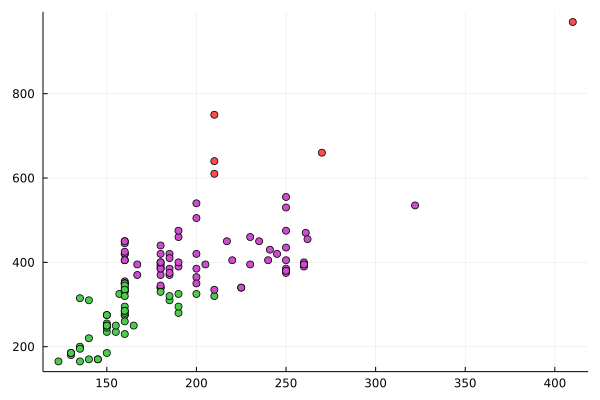

In [674]:
# plot with the point color mapped to the assigned cluster index
scatter(elc.TopSpeed_KM_H, elc.Range_H, marker_z=result.assignments,
        color=:lightrainbow, legend=false)

## k-Medoids Kümeleme

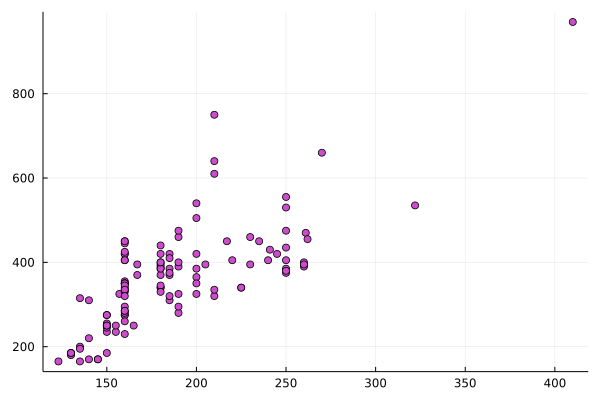

In [544]:
scatter(elc.TopSpeed_KM_H, elc.Range_H,color=:lightrainbow, legend=false)

In [545]:
c=Matrix(features)

4×123 Matrix{Int64}:
 260  250  410  241  260  250  250  190  …  130  130  130  130  160  135  135
 390  405  970  430  400  375  435  460     185  180  185  185  285  200  195
 215  210  206  177  209  189  192  261     243  250  243  243  182  225  231
   3    3    2    2    3    2    2    3       3    1    1    1    2    3    3

In [546]:
D=pairwise(Euclidean(),c,c,dims=2)

123×123 Matrix{Float64}:
   0.0      18.7083  599.151   58.3609  …  148.711   227.651    232.177
  18.7083    0.0     587.232   42.3792     152.594   235.531    240.346
 599.151   587.232     0.0    566.57       729.59    817.855    822.725
  58.3609   42.3792  566.57     0.0        166.166   257.762    263.397
  11.6619   11.225   589.415   47.8121     154.774   236.392    241.11
  31.6544   36.6333  616.372   57.0088  …  127.472   212.478    217.692
  51.5267   35.0     558.588   18.1934     175.214   263.704    268.974
 109.16     96.0521  558.145  102.752      194.337   268.181    272.305
 367.157   351.957   303.516  333.859      475.343   556.677    561.2
 102.103   111.467   683.079  147.347      107.098   148.492    150.901
  85.872    93.8296  667.78   128.639   …  103.812   157.921    161.102
  67.1863   67.7052  640.938   94.5093     102.474   177.48     182.005
 274.423   259.38    342.377  232.039      391.09    482.901    488.416
   ⋮                                    ⋱ 

In [547]:
K=kmedoids(D,3, display=:iter)

  Iters               objv        objv-change
-----------------------------------------------------
      0       8.561412e+03
      1       7.815185e+03      -7.462273e+02
      2       7.420091e+03      -3.950934e+02
      3       7.420091e+03       0.000000e+00
K-medoids converged with 3 iterations (objv = 7420.091092809939)


KmedoidsResult{Float64}([37, 57, 78], [3, 3, 3, 3, 3, 3, 3, 3, 3, 2  …  1, 2, 2, 1, 1, 1, 1, 1, 1, 1], [67.55738301621814, 52.28766584960549, 588.7291397578347, 51.78802950489621, 63.2771680782255, 69.6419413859206, 54.323107422164284, 67.94115100585212, 335.5592347112503, 82.79492738084863  …  96.94843990493091, 62.849025449882674, 89.89994438263018, 92.70922284217467, 101.0, 92.70922284217467, 92.70922284217467, 36.45545226711637, 68.92749814116279, 76.49836599562111], [34, 36, 53], 7420.091092809939, 3, true)

In [548]:
K.assignments

123-element Vector{Int64}:
 3
 3
 3
 3
 3
 3
 3
 3
 3
 2
 2
 2
 3
 ⋮
 3
 2
 1
 2
 2
 1
 1
 1
 1
 1
 1
 1

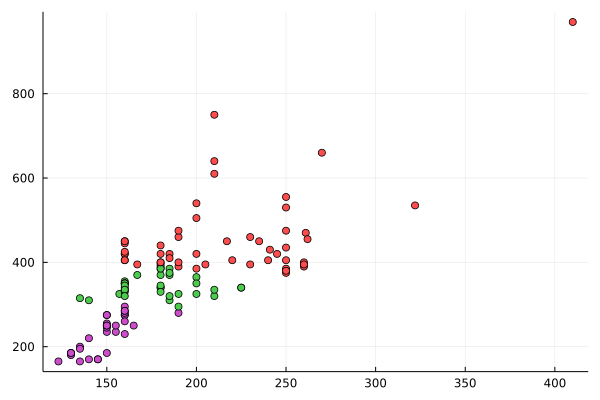

In [549]:
scatter(elc.TopSpeed_KM_H, elc.Range_H, marker_z=K.assignments,color=:lightrainbow, legend=false)

## DBSCAN

In [676]:
delc=pairwise(Euclidean(),features, dims=2)

123×123 Matrix{Float64}:
   0.0      18.7083  599.151   58.3609  …  148.711   227.651    232.177
  18.7083    0.0     587.232   42.3792     152.594   235.531    240.346
 599.151   587.232     0.0    566.57       729.59    817.855    822.725
  58.3609   42.3792  566.57     0.0        166.166   257.762    263.397
  11.6619   11.225   589.415   47.8121     154.774   236.392    241.11
  31.6544   36.6333  616.372   57.0088  …  127.472   212.478    217.692
  51.5267   35.0     558.588   18.1934     175.214   263.704    268.974
 109.16     96.0521  558.145  102.752      194.337   268.181    272.305
 367.157   351.957   303.516  333.859      475.343   556.677    561.2
 102.103   111.467   683.079  147.347      107.098   148.492    150.901
  85.872    93.8296  667.78   128.639   …  103.812   157.921    161.102
  67.1863   67.7052  640.938   94.5093     102.474   177.48     182.005
 274.423   259.38    342.377  232.039      391.09    482.901    488.416
   ⋮                                    ⋱ 

In [677]:
L=dbscan(delc, 1000, 10)

DbscanResult([1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [123])

In [678]:
@show length(unique(L.assignments))

length(unique(L.assignments)) = 1


1

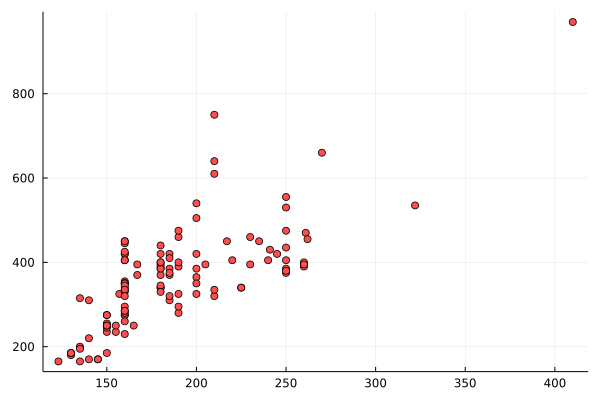

In [679]:
scatter(elc.TopSpeed_KM_H, elc.Range_H,color=:lightrainbow,  marker_z=L.assignments,legend=false)

## k-En Yakın Komşuluk Algoritması

In [723]:
using Pkg
Pkg.add("DecisionTree")
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("MLBase")
Pkg.add("NearestNeighbors")
Pkg.add("DataStructures")

using DataStructures
using NearestNeighbors
using MLBase
using DecisionTree
using CSV
using DataFrames

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.6/Project.toml`
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


In [747]:
using Lathe.preprocess: TrainTestSplit
train,test=TrainTestSplit(elc,.60)

(70×11 DataFrame
 Row │ Name                               Acceleration_SEC  TopSpeed_KM_H  Ran ⋯
     │ String63                           Int64             Int64          Int ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Audi_e-tron_GT_RS                                 1            250      ⋯
   2 │ Tesla_Roadster_                                   1            410
   3 │ Tesla_Model_Y_Performance                         1            241
   4 │ Porsche_Taycan_Turbo                              1            260
   5 │ Tesla_Cybertruck_Tri_Motor                        1            210      ⋯
   6 │ Audi_e-tron_S_55_quattro                          1            210
   7 │ Lucid_Air_Touring                                 1            250
   8 │ Lucid_Air_Pure                                    1            200
   9 │ Tesla_Model_3_Performance                         1            261      ⋯
  10 │ Tesla_Model_X_Plaid                           

In [748]:
#feature selection (Train)
features = Array(train[:,[:TopSpeed_KM_H, :Range_H]])
labels = Array(train[:,:NumberofSeats])
features = float.(features)

70×2 Matrix{Float64}:
 250.0  405.0
 410.0  970.0
 241.0  430.0
 260.0  400.0
 210.0  750.0
 210.0  320.0
 250.0  530.0
 200.0  540.0
 261.0  470.0
 262.0  455.0
 245.0  420.0
 180.0  340.0
 250.0  385.0
   ⋮    
 160.0  350.0
 160.0  425.0
 160.0  405.0
 180.0  385.0
 160.0  340.0
 180.0  400.0
 160.0  350.0
 135.0  315.0
 160.0  320.0
 130.0  185.0
 135.0  200.0
 135.0  195.0

#### Yukarıda verilen 70x2 lik matris, seçtiğimiz maksimum hız ve maksimum mesafe değişkenlerimiz ile Araç yüksekliğine aittir.

In [749]:
# feature_selection (Test)
features_test = Array(test[:,[:TopSpeed_KM_H, :Range_H]])
labels_test = Array(test[:,:NumberofSeats])
features_test = float.(features_test)

53×2 Matrix{Float64}:
 260.0  390.0
 250.0  375.0
 250.0  435.0
 190.0  460.0
 210.0  335.0
 200.0  365.0
 270.0  660.0
 250.0  555.0
 322.0  535.0
 250.0  475.0
 240.0  405.0
 250.0  380.0
 260.0  395.0
   ⋮    
 185.0  310.0
 185.0  410.0
 210.0  640.0
 180.0  400.0
 160.0  345.0
 160.0  450.0
 160.0  335.0
 123.0  165.0
 130.0  185.0
 130.0  180.0
 130.0  185.0
 160.0  285.0

#### Bu matris ise test için düzenlediğimiz 53x2 lik matrisimiz.

In [750]:
kdtree=KDTree(features')

KDTree{StaticArrays.SVector{2, Float64}, Euclidean, Float64}
  Number of points: 70
  Dimensions: 2
  Metric: Euclidean(0.0)
  Reordered: true

In [751]:
idxs,dists=knn(kdtree, features_test',5, true)

([[4, 13, 1, 11, 3], [13, 4, 1, 58, 11], [3, 11, 10, 1, 4], [37, 57, 33, 45, 14], [6, 58, 53, 29, 56], [53, 50, 55, 46, 54], [15, 5, 7, 8, 14], [7, 8, 15, 14, 9], [7, 9, 10, 8, 14], [9, 10, 3, 7, 11]  …  [15, 8, 5, 7, 14], [64, 41, 35, 38, 52], [25, 59, 65, 63, 47], [60, 33, 37, 57, 61], [44, 63, 65, 25, 47], [48, 68, 28, 70, 69], [68, 70, 69, 48, 28], [68, 48, 70, 28, 69], [68, 70, 69, 48, 28], [51, 23, 43, 22, 24]], [[10.0, 11.180339887498949, 18.027756377319946, 33.54101966249684, 44.28317965096906], [10.0, 26.92582403567252, 30.0, 43.01162633521314, 45.27692569068709], [10.295630140987, 15.811388300841896, 23.323807579381203, 30.0, 36.40054944640259], [15.0, 40.311288741492746, 41.23105625617661, 41.23105625617661, 46.09772228646444], [15.0, 15.811388300841896, 18.027756377319946, 22.360679774997898, 29.154759474226502], [15.0, 15.811388300841896, 18.027756377319946, 20.0, 25.0], [78.10249675906654, 108.16653826391968, 131.52946437965906, 138.92443989449805, 170.07351351694948], [2

#### Yukarıdaki grup değerleri arasında en küçük olan [4, 13, 1, 11, 3] grubudur ve en kısa uzaklığa sahiptir.

In [752]:
idxs

53-element Vector{Vector{Int64}}:
 [4, 13, 1, 11, 3]
 [13, 4, 1, 58, 11]
 [3, 11, 10, 1, 4]
 [37, 57, 33, 45, 14]
 [6, 58, 53, 29, 56]
 [53, 50, 55, 46, 54]
 [15, 5, 7, 8, 14]
 [7, 8, 15, 14, 9]
 [7, 9, 10, 8, 14]
 [9, 10, 3, 7, 11]
 [1, 11, 4, 13, 3]
 [13, 4, 1, 11, 58]
 [4, 13, 1, 11, 3]
 ⋮
 [56, 34, 29, 32, 6]
 [57, 38, 64, 33, 41]
 [15, 8, 5, 7, 14]
 [64, 41, 35, 38, 52]
 [25, 59, 65, 63, 47]
 [60, 33, 37, 57, 61]
 [44, 63, 65, 25, 47]
 [48, 68, 28, 70, 69]
 [68, 70, 69, 48, 28]
 [68, 48, 70, 28, 69]
 [68, 70, 69, 48, 28]
 [51, 23, 43, 22, 24]

In [753]:
c=labels[hcat(idxs...)]

5×53 Matrix{Int64}:
 1  1  0  1  1  0  1  1  1  1  1  1  1  …  1  1  1  0  1  1  1  1  0  0  0  0
 1  1  1  1  1  1  0  1  1  0  1  1  1     0  1  1  0  1  0  0  0  0  1  0  0
 1  1  0  0  0  0  1  1  0  0  1  1  1     1  0  0  0  0  1  0  1  0  0  0  0
 1  1  1  0  1  0  1  0  1  1  1  1  1     0  0  1  1  0  1  1  0  1  1  1  0
 0  1  1  0  1  0  0  1  0  1  0  1  0     1  0  0  0  0  0  0  0  1  0  1  1

In [755]:
possible_labels=map(i->counter(c[:,i]),1:size(c,2))

53-element Vector{Accumulator{Int64, Int64}}:
 Accumulator(0 => 1, 1 => 4)
 Accumulator(1 => 5)
 Accumulator(0 => 2, 1 => 3)
 Accumulator(0 => 3, 1 => 2)
 Accumulator(0 => 1, 1 => 4)
 Accumulator(0 => 4, 1 => 1)
 Accumulator(0 => 2, 1 => 3)
 Accumulator(0 => 1, 1 => 4)
 Accumulator(0 => 2, 1 => 3)
 Accumulator(0 => 2, 1 => 3)
 Accumulator(0 => 1, 1 => 4)
 Accumulator(1 => 5)
 Accumulator(0 => 1, 1 => 4)
 ⋮
 Accumulator(0 => 2, 1 => 3)
 Accumulator(0 => 3, 1 => 2)
 Accumulator(0 => 2, 1 => 3)
 Accumulator(0 => 4, 1 => 1)
 Accumulator(0 => 3, 1 => 2)
 Accumulator(0 => 2, 1 => 3)
 Accumulator(0 => 3, 1 => 2)
 Accumulator(0 => 3, 1 => 2)
 Accumulator(0 => 3, 1 => 2)
 Accumulator(0 => 3, 1 => 2)
 Accumulator(0 => 3, 1 => 2)
 Accumulator(0 => 4, 1 => 1)

#### Kod kısmında c olarak oluşturduğumuz matris yukardaki tabloda 0 ve 1 değerlerinin kaç tane olduğunu veriyor.

In [756]:
argmax(a)

2

### predictions_NN=map(i->parse(Int,string(argmax(DataFrame(possible_labels[i])[1,:]))),1:size(c,2))

#### Hata aldığım kodun çözümünü bulamadığım için analizimizi burada bitiriyoruz.

## Özet 

### Araştırmamdaki amaçlar;
##### Elektrikli araçlarda maksimum hız ile maksimum mesafe arasındaki doğrusal ilişki.
##### Elektrikli araç yüksekliği ile maksimum hız, maksimum mesafe ve elektrik tüketimi arasındaki doğrusal ilişki.
##### Elektrikli araç verimizde yapay test verileri oluşturma.

### Sonuç olarak;
##### Elektrikli araçlarda maksimum mesafe maksimumu hızı %60 oranında açıklamaktadır ve kısmen doğrusallık olduğunu söyleyebiliriz.
##### Elektrikli araç yükseliği ilk maksimum hız, maksimum mesafe ve elektrik tüketimi arasında anlamlı bir ilişki vardır.
##### Elektrikli araç verimizde oluşturduğumuz yapay test verileri dikkate alınacak şekilde verimli değildir üzerinde çok daha fazla çalışarak verimliliği arttırılabilir.


## KAYNAKÇA 

### https://www.kaggle.com/kkhandekar/cheapest-electric-cars